Pada case kali ini, silahkan teman-teman Analisa (Descriptive, Diagnostic, Predictive, Prescriptive) data customer yang disediakan panitia. Tuangkan hasil Analisa teman-teman pada deck report yang bisa menjawab salah satu pernyataan berikut! Atau silahkan teman-teman tambahkan objektif tersendiri sesuai dengan data yang ada.

*   Customer seperti apa yang bisa ditawari produk baru terlebih dahulu?
*   Jika kita ingin membuat segmen, segmen seperti apa yang ingin teman-teman buat?
*   Bagaimana jenis-jenis pembeli di took tersebut menurut barang yang dibelinya?

2 | Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

3 | Loading Data

In [5]:
df = pd.read_csv(r'202207_data_campaign.csv', delimiter='\t' , parse_dates=['Dt_Customer'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


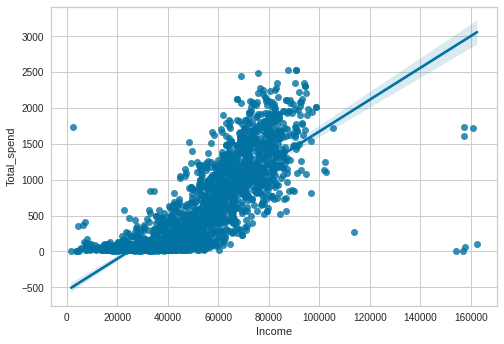

In [85]:
sns.regplot(data = df, x = 'Income', y = 'Total_spend')

4 | Data Cleansing

In [7]:
counts = df.nunique()
counts

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df.drop(['Z_CostContact' ,'Z_Revenue'] , axis = 1 , inplace=True)

In [9]:
df.isna().sum().sort_values(ascending=False)[:10]

Income               24
ID                    0
MntGoldProds          0
Complain              0
AcceptedCmp2          0
AcceptedCmp1          0
AcceptedCmp5          0
AcceptedCmp4          0
AcceptedCmp3          0
NumWebVisitsMonth     0
dtype: int64

In [10]:
df.dropna(inplace=True) # dropped rows with the null values

In [11]:
# we check for the data types
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

5 | Data Prepocessing

In [12]:
# we run simple For-Loops to subtract the registration date of each customer from the max date to find the days a customer has been registered with the business
datelist = []
for i in df["Dt_Customer"]:
    datelist.append(i.date())

duration_list = []
for i in df["Dt_Customer"]:
    duration_list.append(max(datelist) - i.date())
    
df["dayscustomerfor"] = duration_list

In [13]:
# we extract the number of days and store it back to the feature
df["dayscustomerfor"] = df["dayscustomerfor"].apply(lambda x: int(str(x).split(" ")[0]))

In [14]:
# we check the stats of our new feature
df["dayscustomerfor"].describe()

count    2216.000000
mean      512.006318
std       232.469034
min         0.000000
25%       340.000000
50%       513.000000
75%       686.000000
max      1063.000000
Name: dayscustomerfor, dtype: float64

In [15]:
# we create masks with quantile method to filter out data and categorise them
masknew = df["dayscustomerfor"] <= df["dayscustomerfor"].quantile(0.3)
maskold = df["dayscustomerfor"] > df["dayscustomerfor"].quantile(0.3)
df.loc[masknew, "Cust_Seniority"] = "New"
df.loc[maskold, "Cust_Seniority"] = "Old"
df["Cust_Seniority"].value_counts() # we display the New and Old value counts

Old    1549
New     667
Name: Cust_Seniority, dtype: int64

In [16]:
# we check for the max year of our date list
max(datelist)

datetime.date(2014, 12, 6)

In [17]:
# created new feature age
df["Age"] = 2014 - df["Year_Birth"]

In [18]:
df['Age'] = 2015 - df['Year_Birth'] #assuming the data was collected at 2015

df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [19]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}) # simplified

In [20]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
# created new feature "Couple", 1 if yes, 0 if no
df["Couple"] = df["Marital_Status"].apply(lambda x: 1 if (x == "Married" or x == "Together") else 0)

In [22]:
df["Children"] = df["Kidhome"] + df["Teenhome"] # combined Kidhome and Teenhome as number of children

In [23]:
df["Total_spend"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [24]:
# we also rename the name of the items
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [25]:
# we check the stats of our new feature
df["Total_spend"].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_spend, dtype: float64

In [26]:
df["Total_campaigns_accepted"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df["Response"]

In [27]:
# we drop all the redundant featues
to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'dayscustomerfor']
df.drop(to_drop, axis=1, inplace=True)

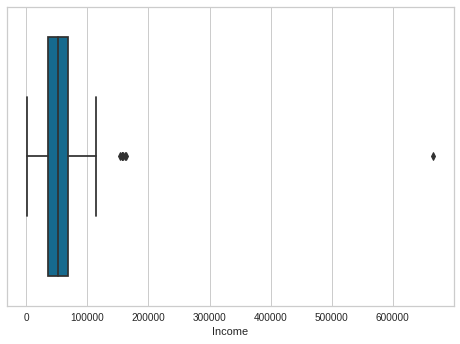

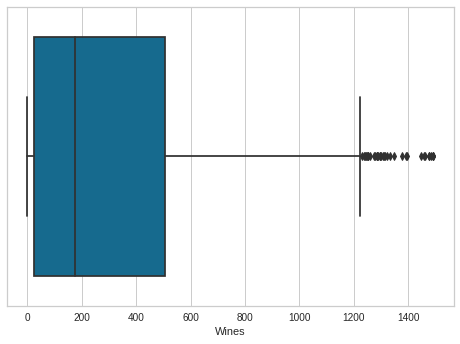

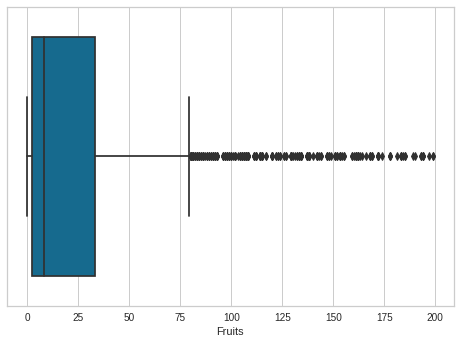

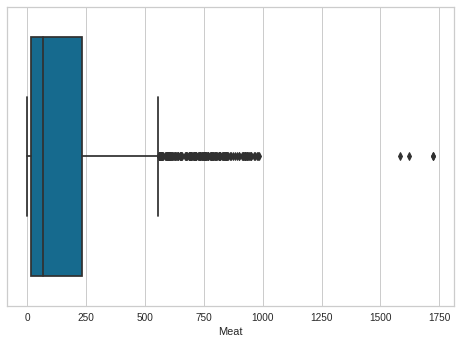

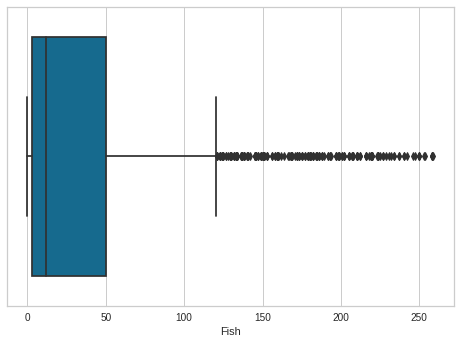

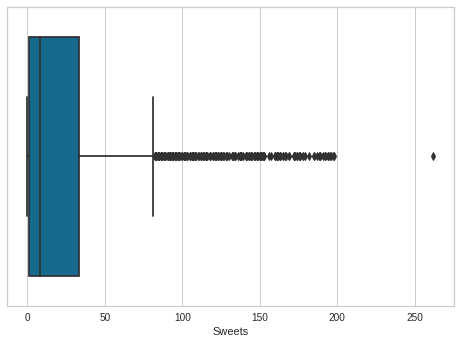

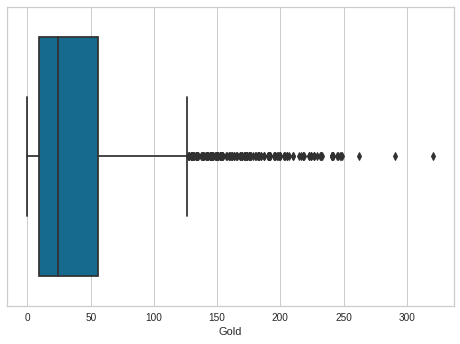

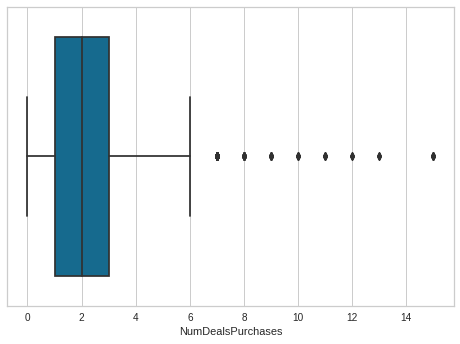

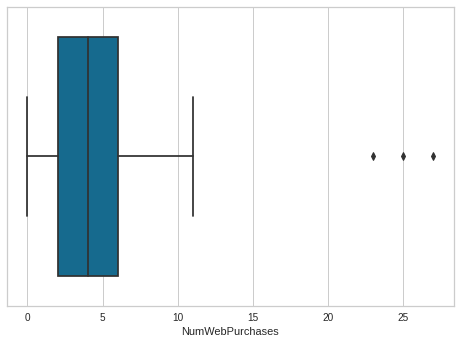

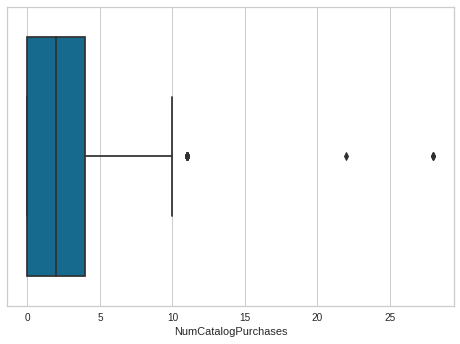

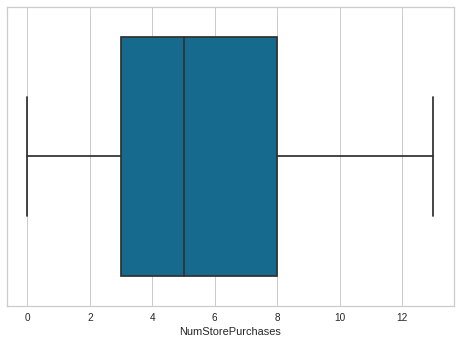

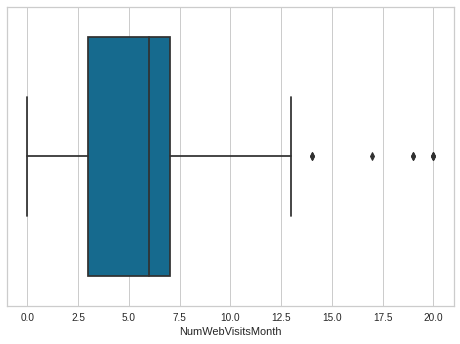

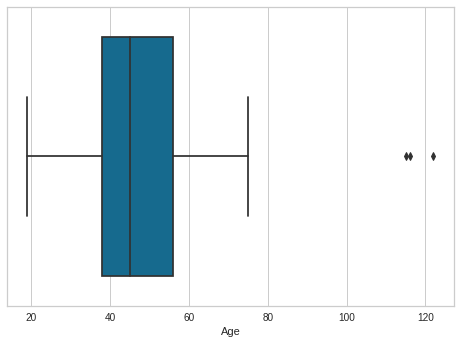

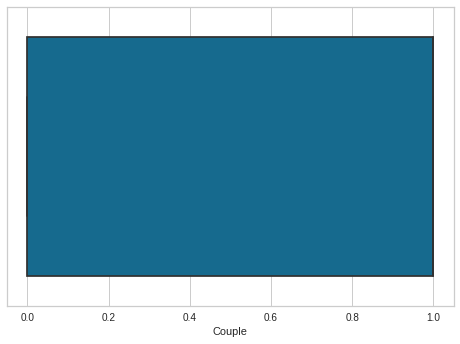

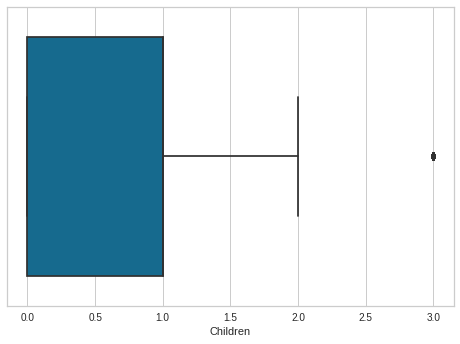

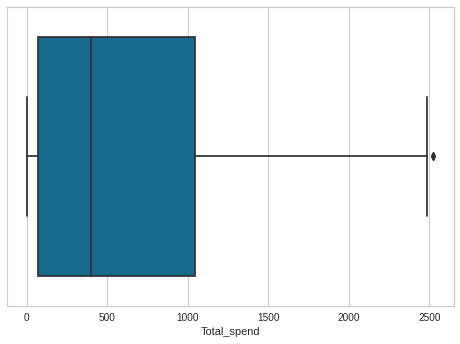

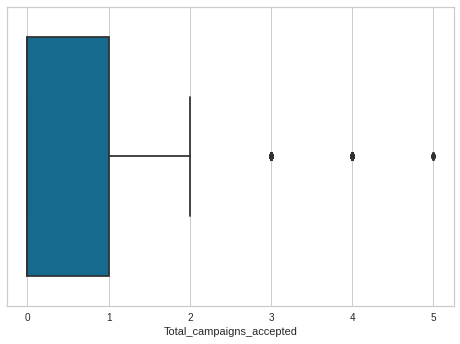

In [28]:
# box plot for all numerical features
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(i)
        sns.boxplot(data=df, x=i)

In [29]:
# filtered out the outliers
df = df[df["Income"] < 600000]
df = df[df["Age"] < 100]

In [30]:
# we do a groupby with education and check the income stats
df.groupby("Education")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,52169.75,21354.32,1730.0,34831.0,51983.0,69915.5,157146.0
Postgraduate,845.0,54718.66,20456.55,4023.0,38829.0,54108.0,68352.0,162397.0
Undergraduate,252.0,41771.25,22828.77,7500.0,23551.5,35916.5,60330.5,96547.0


In [31]:
# we do a groupby with education and check the total spend stats
df.groupby("Education")["Total_spend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,622.19,600.19,5.0,70.50,415.0,1077.5,2524.0
Postgraduate,845.0,646.42,620.12,8.0,86.00,426.0,1092.0,2525.0
Undergraduate,252.0,409.98,510.59,13.0,50.75,98.0,729.0,2257.0


In [32]:
# we do a groupby with total campaigns accepted and check the income stats
df.groupby("Total_campaigns_accepted")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Total_campaigns_accepted,,,,,,,,
0,1608.0,48292.85,20404.27,1730.0,33181.75,46927.0,63793.00,162397.0
1,368.0,56750.80,20356.12,5648.0,40579.50,58532.0,73741.25,98777.0
2,139.0,61659.04,21751.93,7500.0,46015.00,68117.0,78628.00,96843.0
3,51.0,78462.35,13516.53,37929.0,75519.00,81929.0,85471.50,105471.0
4,36.0,82143.28,11521.92,48192.0,75742.50,82171.5,90253.50,102160.0
5,10.0,86434.40,9316.60,65169.0,84561.25,86727.0,90321.75,102692.0


In [33]:
# a simple For-Loop to detect all categorical features
for i in df.columns:
    if df[i].dtypes == "object":
        print(i)

Education
Cust_Seniority


In [35]:
df

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,58,0,0,1617,1
1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,1,61,0,2,27,0
2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,50,1,0,776,0
3,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,31,1,1,53,0
4,2,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,34,1,1,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,709,43,182,42,118,247,2,9,3,4,5,0,48,1,1,1341,0
2236,2,64014.0,406,0,30,0,0,8,7,8,2,5,7,1,69,1,3,444,1
2237,1,56981.0,908,48,217,32,12,24,1,2,3,13,6,1,34,0,0,1241,1
2238,2,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,59,1,1,843,0


In [36]:
# scaled our data using standard scaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
0,-0.411675,0.287105,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.656345,1.018352,-1.349603,-1.264598,1.676245,0.617244
1,-0.411675,-0.260882,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.523588,1.274785,-1.349603,1.404572,-0.963297,-0.502808
2,-0.411675,0.913196,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.656345,0.334530,0.740959,-1.264598,0.280110,-0.502808
3,-0.411675,-1.176114,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,1.523588,-1.289547,0.740959,0.069987,-0.920135,-0.502808
4,1.123949,0.294307,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,1.523588,-1.033114,0.740959,0.069987,-0.307562,-0.502808


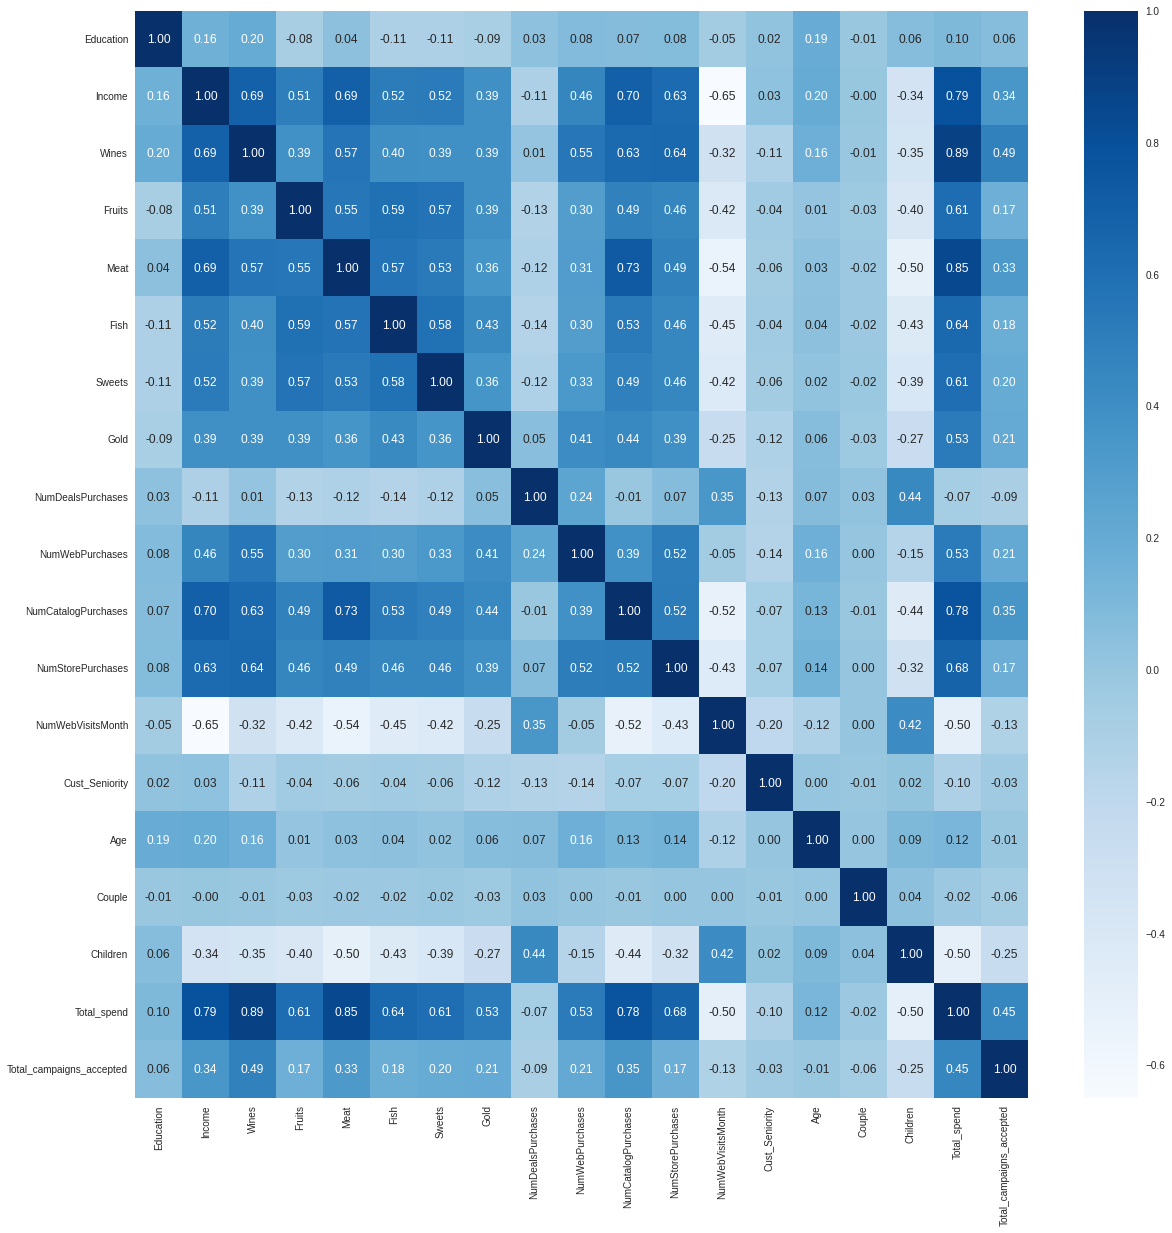

In [37]:
# we plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

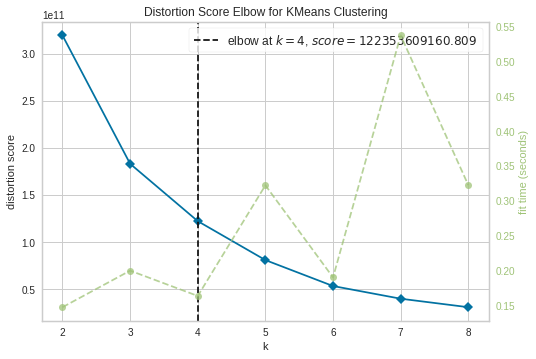

In [38]:
# elbow method plot
to_keep = ['Education', 'Income', 'Cust_Seniority', 'Age',
       'Couple', 'Children', 'Total_spend']

elbow = KElbowVisualizer(KMeans(), k=8)
elbow.fit(df[to_keep])
elbow.show()
plt.show()

In [39]:
# we fit and predict the clusters and add the cluster numbers back to our dataframe
kmeancluster = KMeans(n_clusters=4)
df["kcluster"] = kmeancluster.fit_predict(df[to_keep])

In [40]:
df

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted,kcluster
0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,58,0,0,1617,1,3
1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,1,61,0,2,27,0,1
2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,50,1,0,776,0,3
3,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,31,1,1,53,0,2
4,2,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,34,1,1,422,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,709,43,182,42,118,247,2,9,3,4,5,0,48,1,1,1341,0,3
2236,2,64014.0,406,0,30,0,0,8,7,8,2,5,7,1,69,1,3,444,1,3
2237,1,56981.0,908,48,217,32,12,24,1,2,3,13,6,1,34,0,0,1241,1,3
2238,2,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,59,1,1,843,0,3


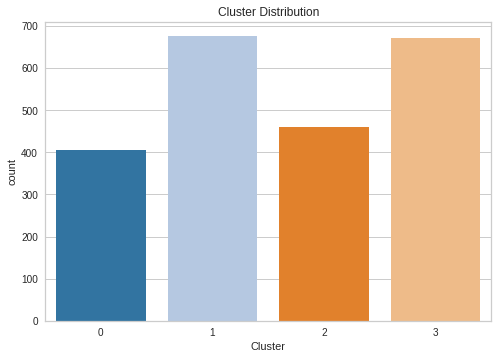

In [41]:
# we check the cluster counts
sns.countplot(data=df, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

In [42]:
df[['kcluster','Education', 'Income', 'Cust_Seniority', 'Age',
       'Couple', 'Children', 'Total_spend']].groupby(by='kcluster').mean()

,Education,Income,Cust_Seniority,Age,Couple,Children,Total_spend
kcluster,,,,,,,
0,1.316049,82717.037037,0.365432,47.116049,0.637037,0.311111,1420.051852
1,1.363905,42191.008876,0.297337,46.402367,0.628698,1.328402,224.294379
2,0.971739,23381.952174,0.293478,40.539130,0.650000,0.986957,76.086957
3,1.345753,62825.140089,0.271237,48.949329,0.664680,0.921013,866.666170


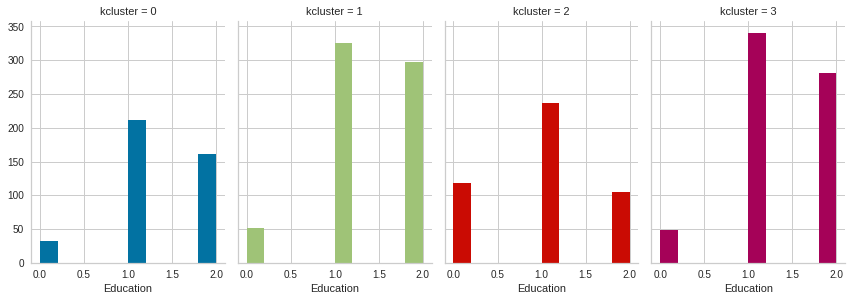

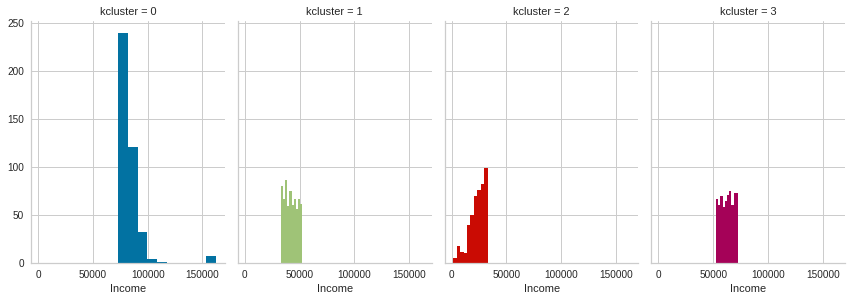

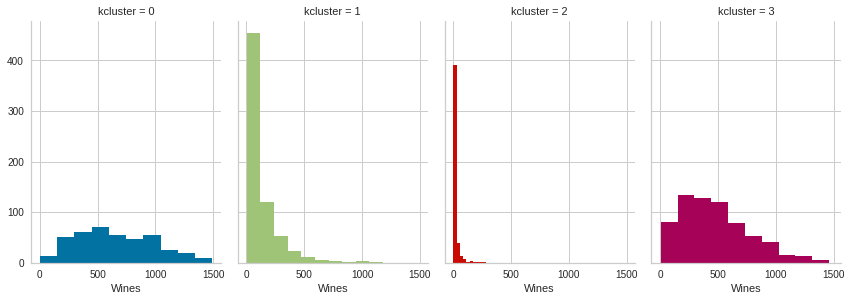

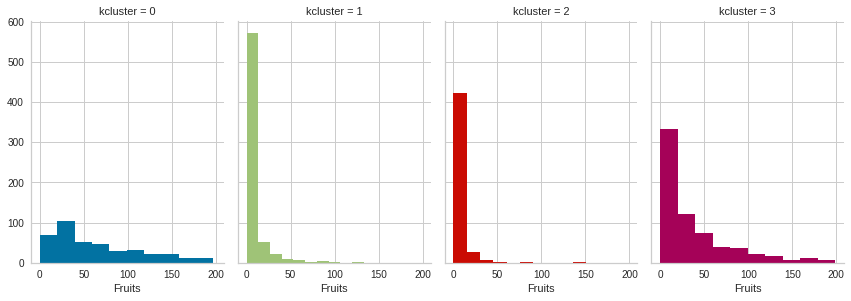

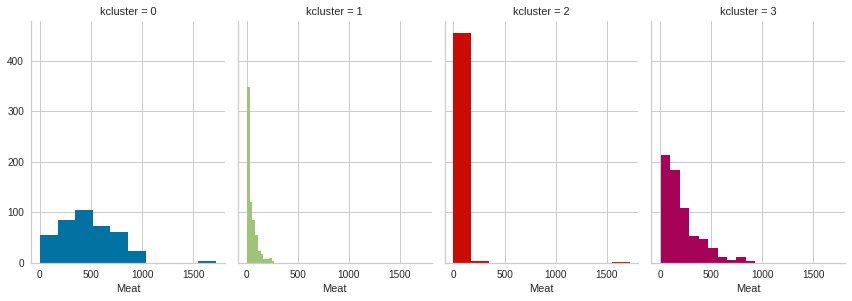

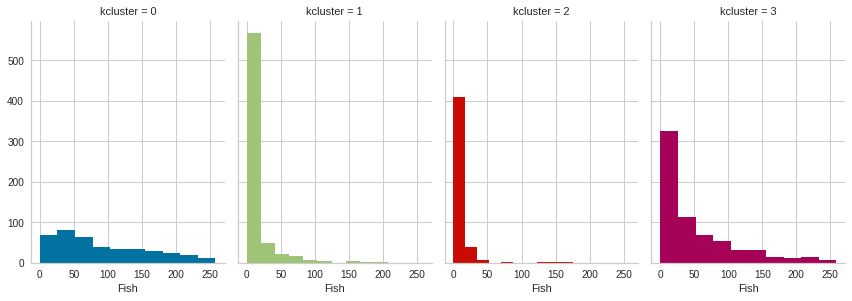

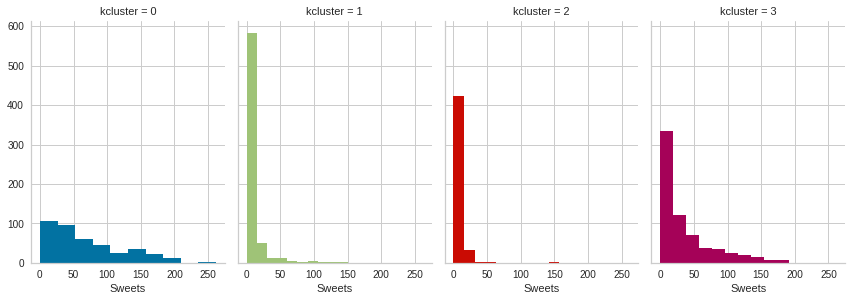

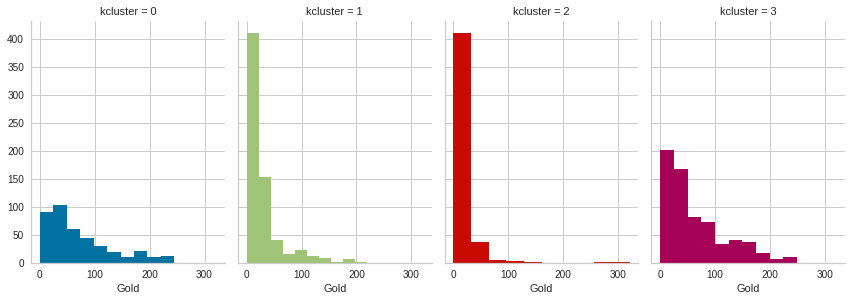

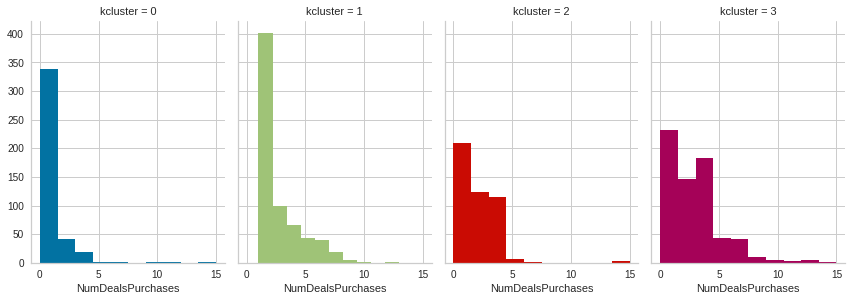

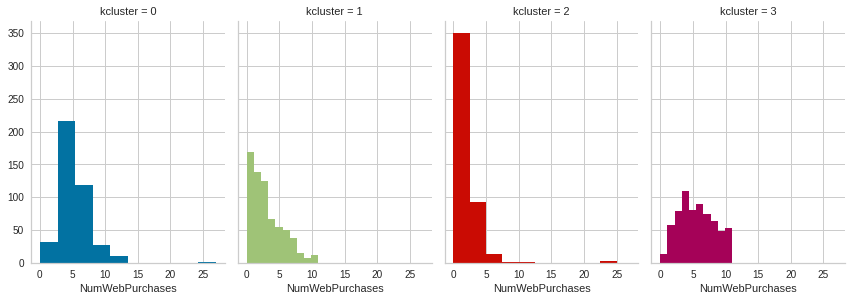

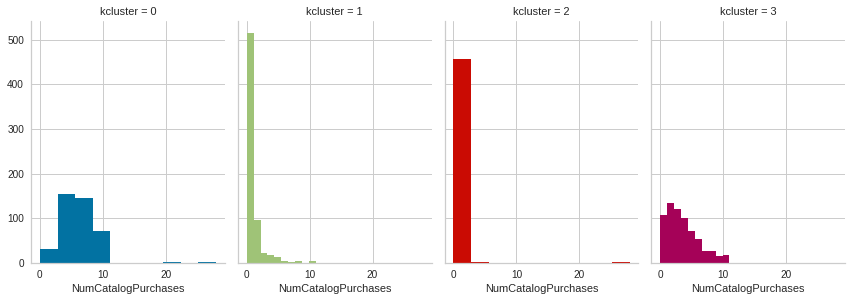

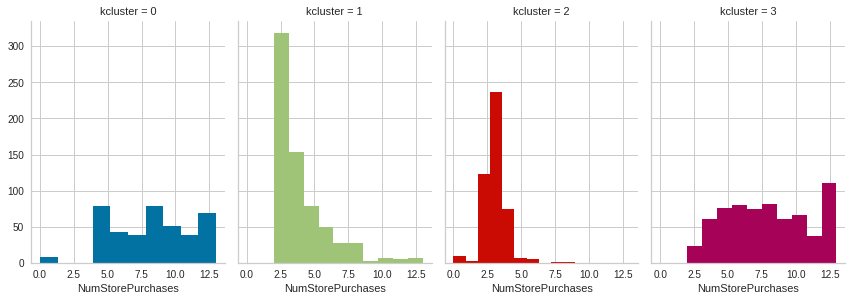

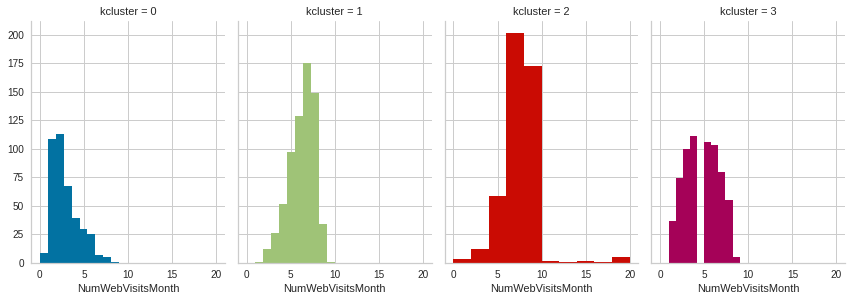

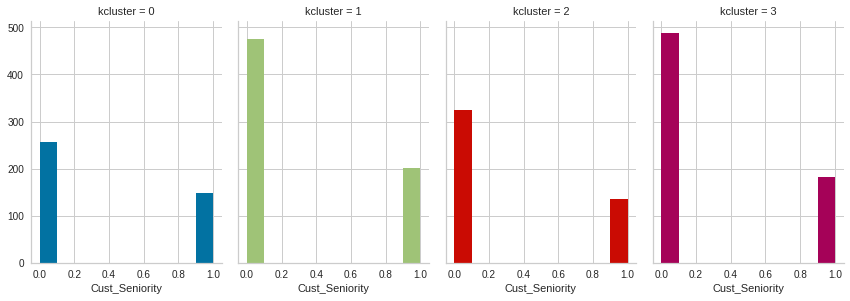

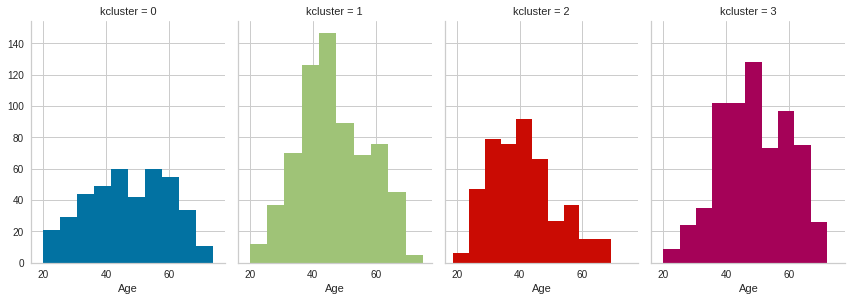

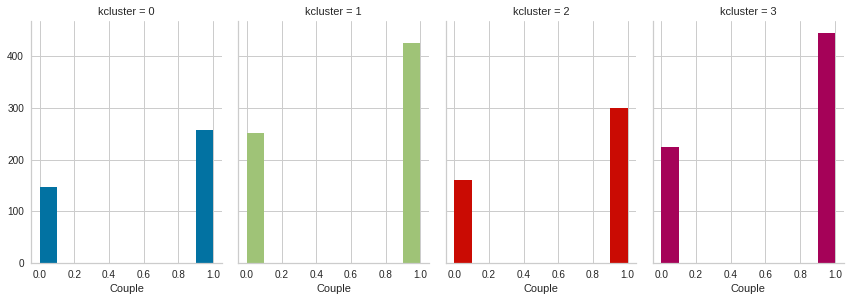

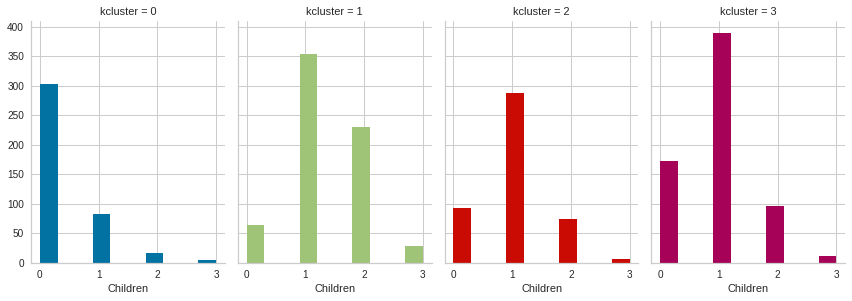

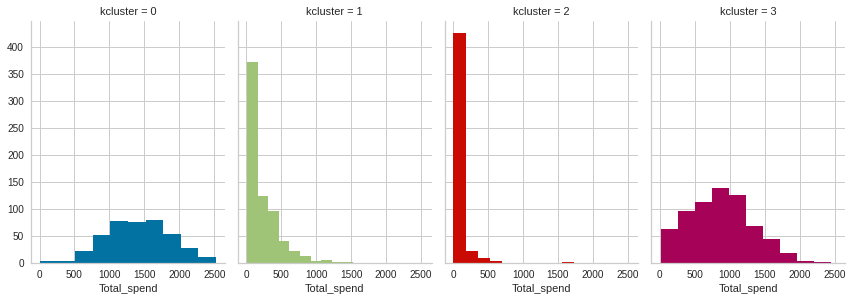

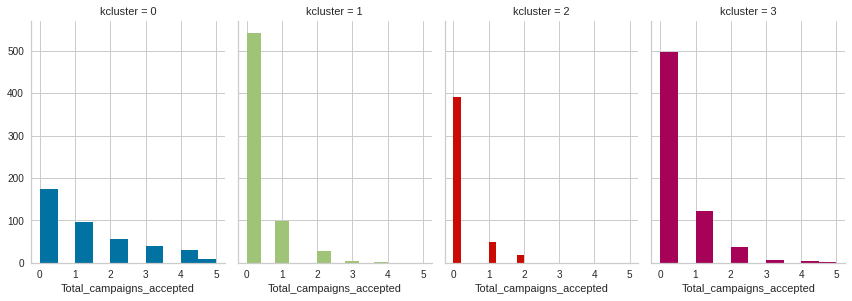

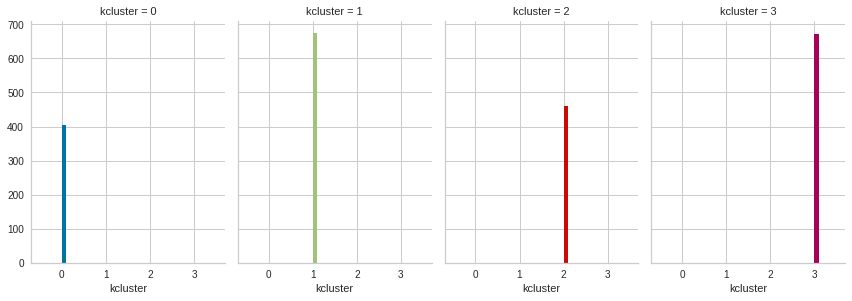

In [45]:
for i in df:
    g = sns.FacetGrid(df, col = "kcluster", hue = "kcluster")
    g.map(plt.hist, i, bins=10) 
    g.fig.set_figheight(5)

In [47]:
df_clus = df.groupby(by='kcluster').mean()
df_clus

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
kcluster,,,,,,,,,,,,,,,,,,,
0,1.316049,82717.037037,657.000000,64.567901,468.716049,91.098765,67.545679,71.123457,1.281481,5.261728,6.007407,8.279012,2.691358,0.365432,47.116049,0.637037,0.311111,1420.051852,1.212346
1,1.363905,42191.008876,120.693787,7.967456,46.550296,13.112426,8.542899,27.427515,2.673077,3.288462,1.118343,4.158284,6.365385,0.297337,46.402367,0.628698,1.328402,224.294379,0.255917
2,0.971739,23381.952174,18.017391,5.830435,21.630435,8.441304,5.767391,16.400000,2.034783,1.971739,0.467391,2.910870,7.078261,0.293478,40.539130,0.650000,0.986957,76.086957,0.186957
3,1.345753,62825.140089,475.907601,35.801788,205.994039,50.129657,35.831595,63.001490,2.801788,5.636364,3.736215,7.959762,4.652757,0.271237,48.949329,0.664680,0.921013,866.666170,0.362146


In [50]:
df_clus.rank(ascending=False)

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
kcluster,,,,,,,,,,,,,,,,,,,
0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,1.0,2.0,3.0,4.0,1.0,1.0
1,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,1.0,3.0,3.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,1.0,3.0,4.0,2.0,2.0,4.0,4.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,2.0,2.0


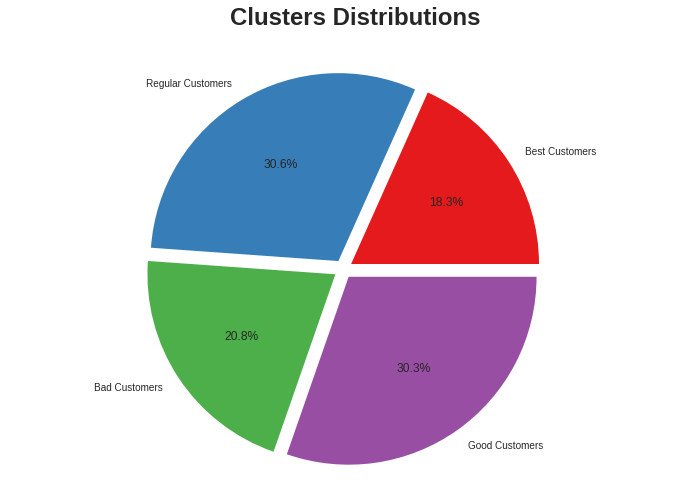

In [62]:
# Results
clusters_count = df['kcluster'].value_counts()                        # Counting wins-losses-draws
clusters_count = clusters_count.to_frame().reset_index()                      # Convert series to dataframe
clusters_count.columns = ['kclusters', 'count']                                # Rename column names
clusters_count = clusters_count.sort_values('kclusters', ascending = True)     # Sorting data

labels = [
        "Best Customers", 
        "Regular Customers", 
        "Bad Customers", 
        "Good Customers"
        ]

# Visualization
plt.figure(figsize=(12,8))


plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        autopct='%1.1f%%',
        colors = sns.color_palette('Set1')[0:4]

        )

plt.axis('equal')

# Title 
plt.text(-0.6, 1.3, "Clusters Distributions", size=24, fontweight="bold")


plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

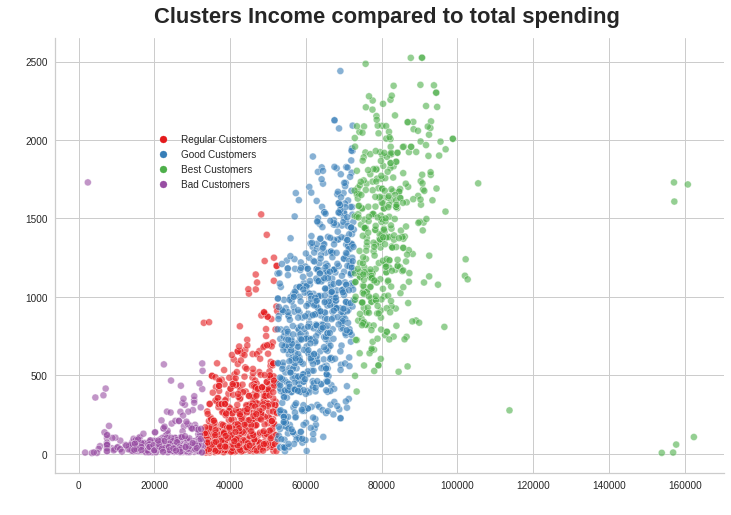

In [68]:
# Creating a new dataset 
clusters_incomes = df[['Income', 'Total_spend', 'kcluster']]           # Select variables
clusters_incomes['group'] = clusters_incomes['kcluster']                     # Create new variable
clusters_incomes['group'] = clusters_incomes['group'].astype(str)           # Change data type 

# Rename values
clusters_incomes['group'] = clusters_incomes['group'].str.replace('0', 'Best Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('1', 'Regular Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('2', 'Bad Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('3', 'Good Customers')

clusters_incomes = clusters_incomes.sort_values('group', ascending = False)    # Sorting data 

# Visualizing 
fig, ax = plt.subplots(figsize =(12, 8))

sns.scatterplot(data = clusters_incomes, x = 'Income', y = 'Total_spend', hue = 'group', palette = 'Set1', alpha=0.6)

# Naming axis labels
plt.xlabel('Income', color = 'white', size = 14);
plt.ylabel('Expenses', color = 'white', size = 14);

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Customize legend
plt.legend(frameon=False, bbox_to_anchor=(0.33, 0.8))    

# Title
plt.text(20000, 2750, "Clusters Income compared to total spending", size=22, fontweight="bold")



plt.show()

In [69]:
import plotly.express as px

In [81]:
from seaborn import palettes
from seaborn.palettes import color_palette
# Creating a new dataset 
clusters_products = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'kcluster']]    # Select variables

clusters_products1 = clusters_products.groupby(['kcluster'])
clusters_products2 = clusters_products1.agg({'Wines':'sum', 'Fruits':'sum', 'Meat':'sum', 'Fish':'sum', 'Sweets':'sum', 'Gold':'sum'})

clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1':'Products'})   # Oposite as pivoting

clusters_products3['group'] = clusters_products3['kcluster']
clusters_products3['group'] = clusters_products3['group'].astype(str)

# Rename values
clusters_products3['group'] = clusters_products3['group'].str.replace('0', 'Best Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('1', 'Regular Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('2', 'Bad Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('3', 'Good Customers')

products = clusters_products3.copy()
products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# Visualization
fig = px.bar(products, x='group', y='ratio', color='Products',
             labels={
                     "ratio": "Ratio",
                     "group": "Consumer's type"
                     },
            color_discrete_sequence=["purple", "green",
                                         "orange", "blue",
                                         "red", 'yellow'],
                title="Products Distribution by Clusters")

fig.layout.yaxis.tickformat = ',.0%'

fig.update_traces( marker_line_width=1, opacity=0.8)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(
    width=800,
    height=500,
    yaxis_title=None,
    xaxis_title=None
)

fig.show()

